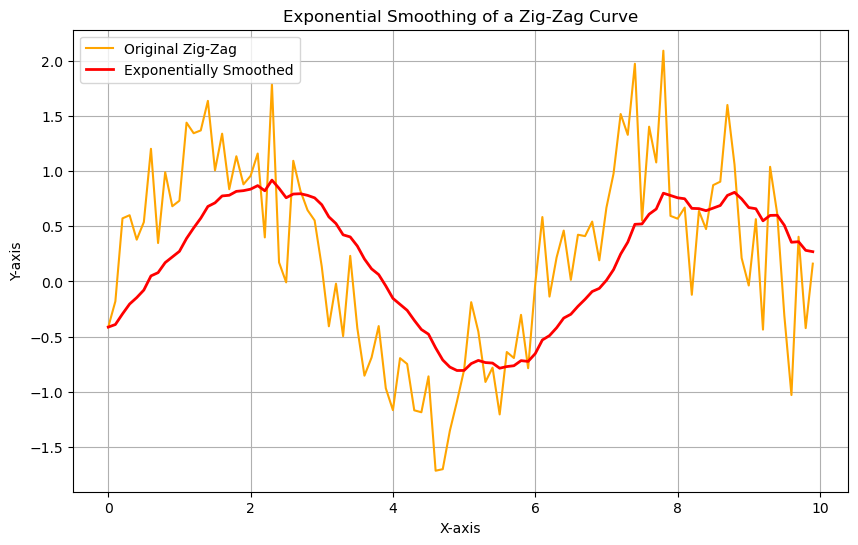

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generating zig-zag points for the plot
x = np.arange(0, 10, 0.1)
y = np.sin(x) + np.random.normal(0, 0.5, len(x))  # Adding noise to make it zig-zag

# Applying exponential smoothing
alpha = 0.1  # Smoothing factor
y_smoothed = [y[0]]  # Initial value for the smoothed curve
for i in range(1, len(y)):
    y_smoothed.append(alpha * y[i] + (1 - alpha) * y_smoothed[i-1])

# Plotting the original and smoothed curves
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Zig-Zag', color='orange')
plt.plot(x, y_smoothed, label='Exponentially Smoothed', color='red', linewidth=2)
plt.title('Exponential Smoothing of a Zig-Zag Curve')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


# 24Seven

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Loading Datasets

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#https://drive.google.com/file/d/1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2/view?usp=sharing

In [21]:
df = pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [22]:
df.shape

(440, 8)

## EDA

In [23]:
df['Region'].value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

In [24]:
df = pd.get_dummies(df, columns = ['Region'])

#storing class label
Y = df['class']
df = pd.get_dummies(df, columns = ['class'])

df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,class_1,class_2,class_3
0,12669,9656,7561,214,2674,1338,False,False,True,False,True,False
1,7057,9810,9568,1762,3293,1776,False,False,True,False,True,False
2,6353,8808,7684,2405,3516,7844,False,False,True,False,True,False
3,13265,1196,4221,6404,507,1788,False,False,True,True,False,False
4,22615,5410,7198,3915,1777,5185,False,False,True,True,False,False


In [25]:
# the feature set

X = df.drop(columns=['class_1', 'class_2', 'class_3'])

Y = df[['class_1', 'class_2', 'class_3']]

X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,False,True
1,7057,9810,9568,1762,3293,1776,False,False,True
2,6353,8808,7684,2405,3516,7844,False,False,True
3,13265,1196,4221,6404,507,1788,False,False,True
4,22615,5410,7198,3915,1777,5185,False,False,True


In [26]:
Y.head()

,class_1,class_2,class_3
0,False,True,False
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


In [28]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (356, 9) (356, 3)
Validation: (40, 9) (40, 3)
Test  :  (44, 9) (44, 3)


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [30]:
X_train.shape

(356, 9)

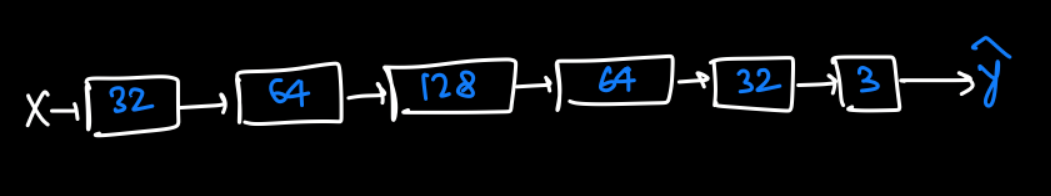

In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
def create_baseline():

  model = Sequential([
                    Dense(32, activation="relu" ,input_shape=(X_train.shape[1],)),
                    Dense(64, activation="relu"),
                    Dense(128, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(32, activation="relu"),
                    Dense(3,activation='softmax')])
  return model

model = create_baseline()

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                320       
                                                                 
 dense_31 (Dense)            (None, 64)                2112      
                                                                 
 dense_32 (Dense)            (None, 128)               8320      
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 3)                 99        
                                                                 
Total params: 21187 (82.76 KB)
Trainable params: 21187

# Vanilla SGD

In [39]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=128, verbose = 0, validation_data=(X_val, y_val))

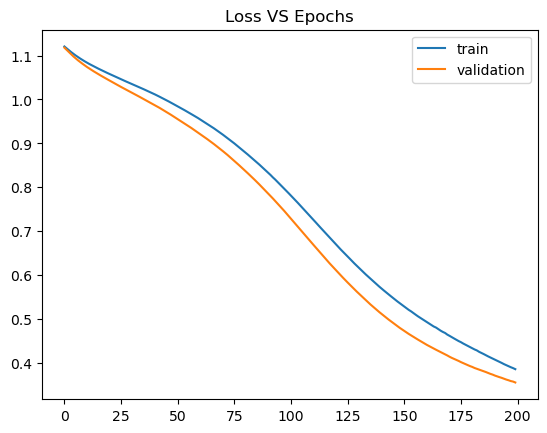

In [36]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

# GD with momentum

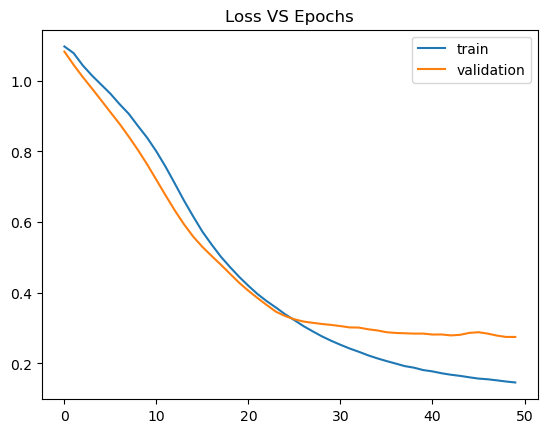

In [40]:
model = create_baseline()

model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose = 0, validation_data=(X_val, y_val))


epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

## RMS PROP

In [41]:
dir(tf.keras.optimizers)

['Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'Ftrl',
 'Lion',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'experimental',
 'get',
 'legacy',
 'schedules',
 'serialize']

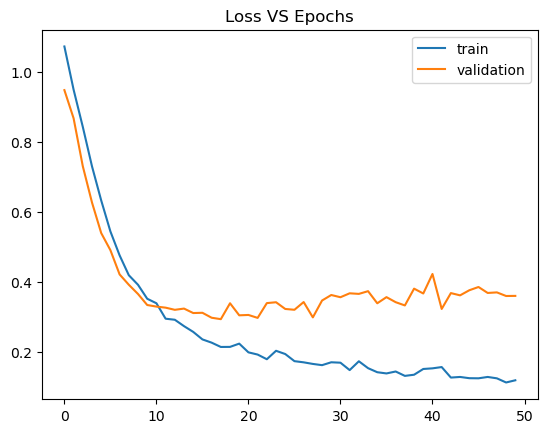

In [42]:
model = create_baseline()

model.compile(optimizer=tf.keras.optimizers.RMSprop()     , loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose = 0, validation_data=(X_val, y_val))


epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

# Adam

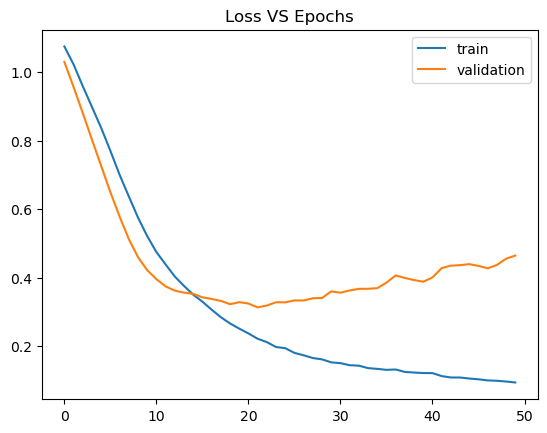

In [43]:
model = create_baseline()

model.compile(optimizer=tf.keras.optimizers.Adam()     , loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose = 0, validation_data=(X_val, y_val))


epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()

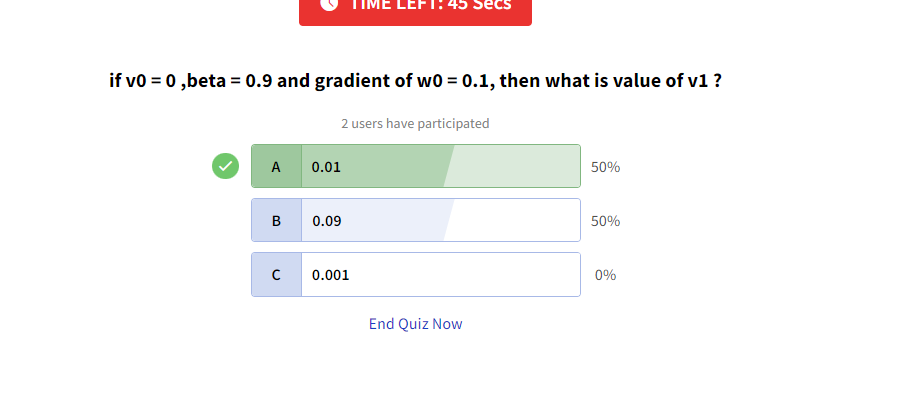

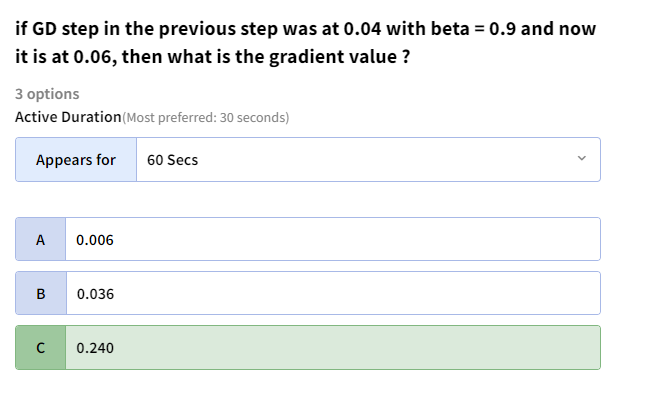

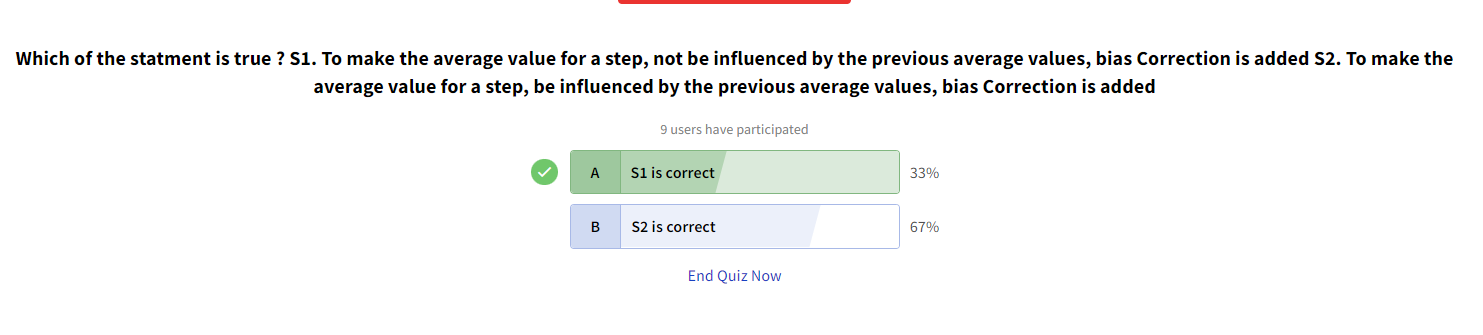

In [ ]:
# from tensorflow.keras.callbacks import LearningRateScheduler
